# Software HW 8

_Due 3/1/2023_

For submission instructions, see the last section!

## Simulating a Detector

The [MATHUSLA](https://mathusla-experiment.web.cern.ch/) detector is being designed to search for Ultra Long-Lived Particles. The detector design itself is a very simple 4 planes of charged particle detector. This detector has no magnetic field, so when a charged particle goes through it, it leaves hits that look like a straight line. We can use least-squares to fit the points, and then recover the original track parameters.

In this homework we will:

1. Generate a set of straight lines that will hit the detector
1. Simulate the charged particles hitting the detector, generating a set of points

Next week:

1. Use least squares to reconstruct the hits back to the line parameters (slope, etc.)
1. Compare with the originally generated tracks to see how well we do

And hopefully we will have time to add detector effects (smearing, etc.) which will start to show some differences in these plots.

I used regular python to solve this. If you are feeling ambitious, feel free to use `numpy` for all the calculations. It will be faster for large numbers of particles.

### The detector

Here is a picture of the detector that I pulled from [the website](https://mathusla-experiment.web.cern.ch/).
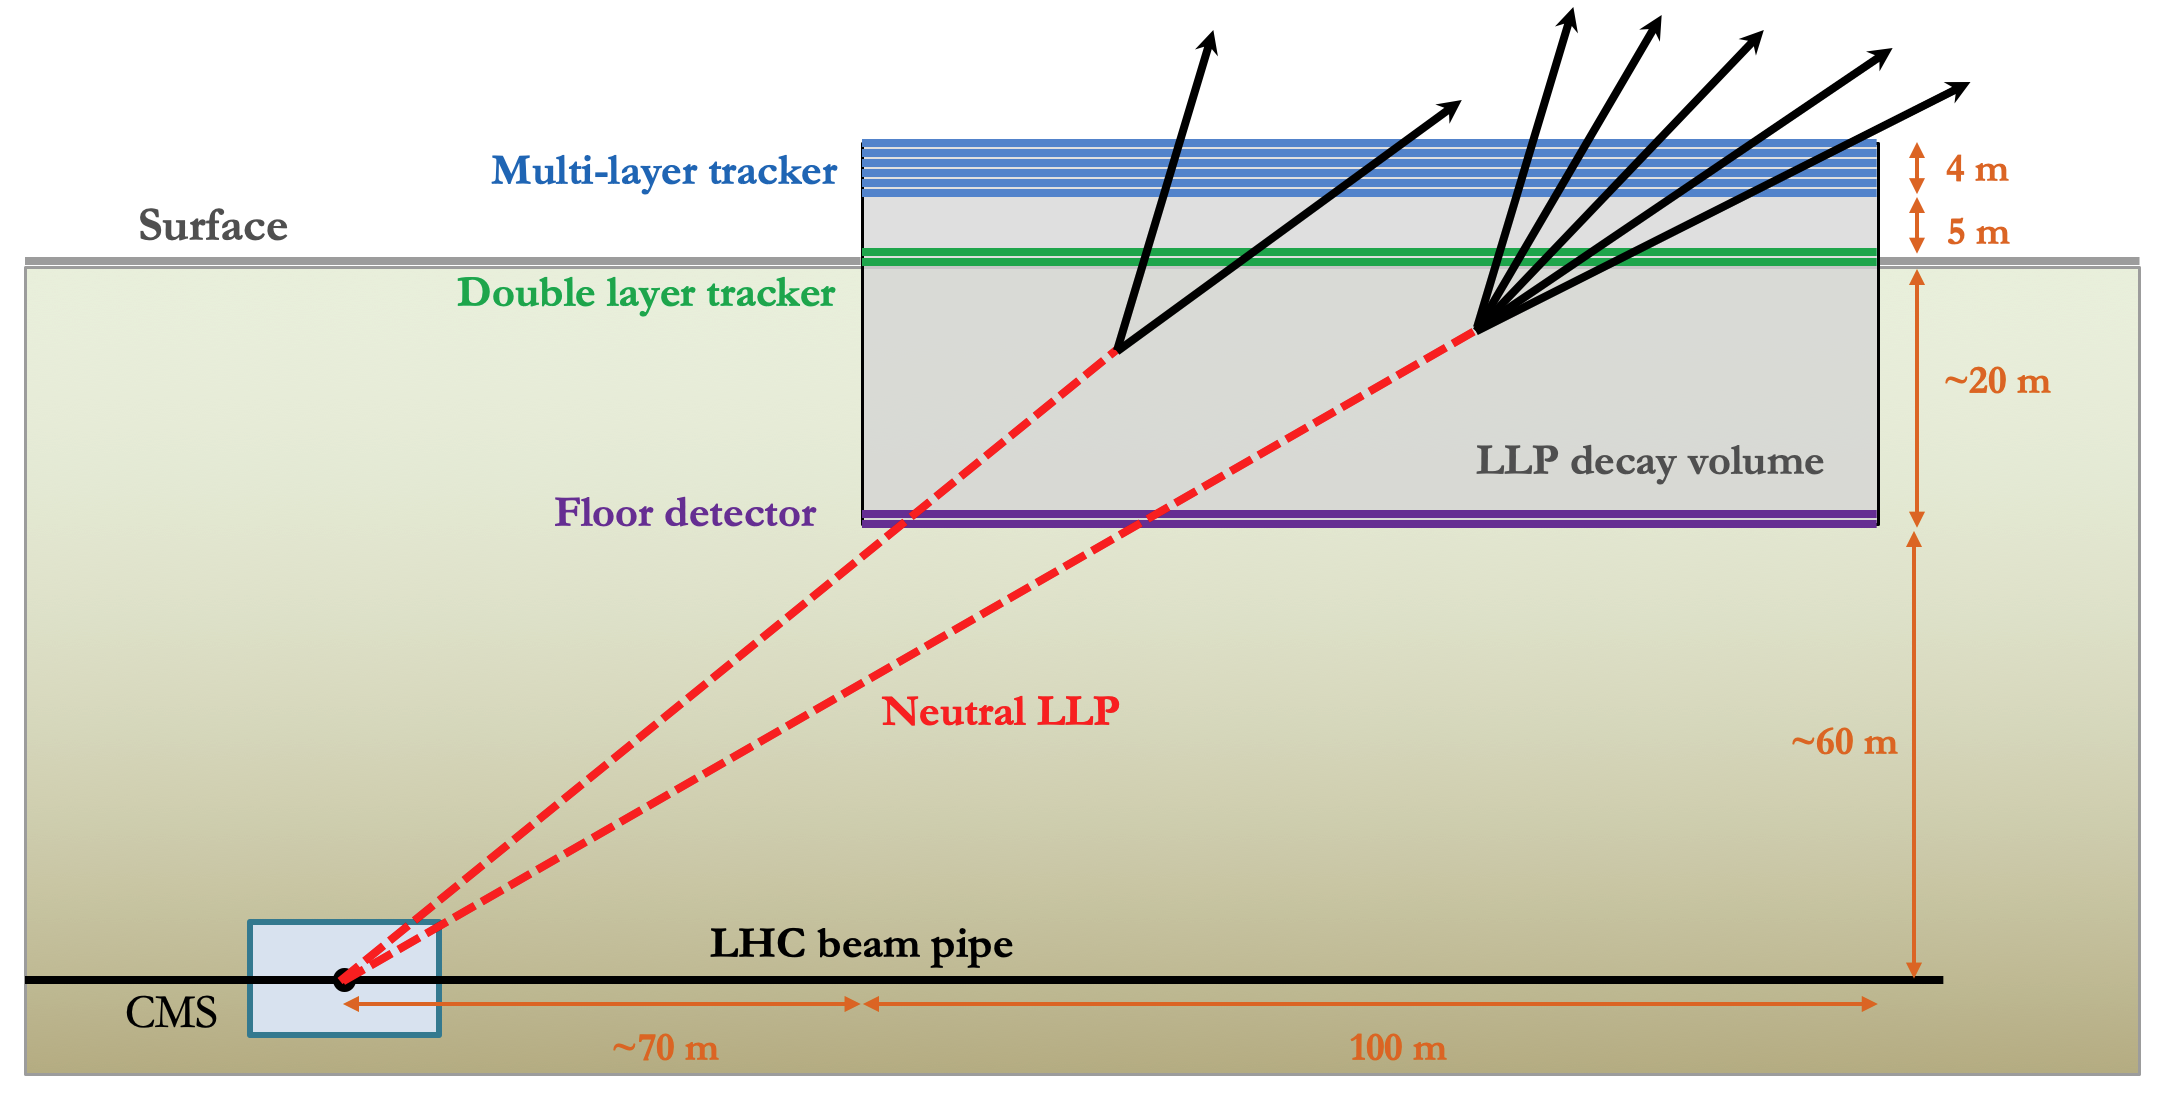

We will only concern ourselves with the blue tracking layers in the image above. For simplicity lets say that the detector is square, 100 m by 100 m (two european football pitches). The (0,0) coordinate is at the lower left hand part of the detector, as shown below. The detector itself is 4 m high, and has 5 layers of tracking detectors in it.
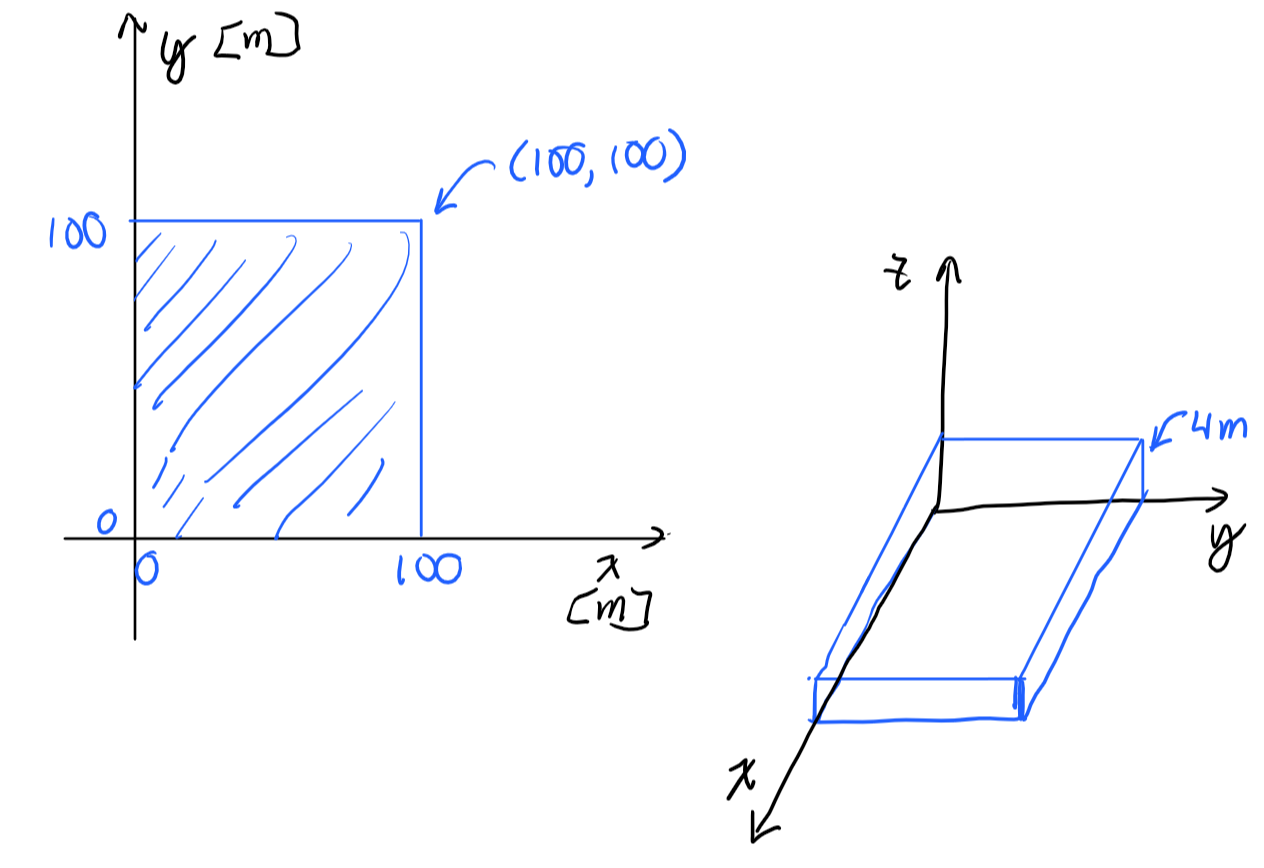

We will shoot particles at the detector from a single point at $(x, y, z) = (0, 0, -100)$. All distance units are meters unless otherwise mentioned.

Here are some constants to help with coding below (and everything should be done in terms of this so we can easily change it alter if we want):

In [ ]:
gun_coordinates = (0, 0, -100)

det_x_width = 100.0
det_y_width = 100.

det_layer_z = [i*4/4 for i in range(5)]

This is part of the mantra that there should be no magic numbers in your code!

## Generation

We'll use a technique called a _particle gun_: this isn't _physics_ per-see, however it is an excellent way to test detector geometry. A particle gun is very simple: it just shoots a single particle out one at a time, in a particular direction. We will randomly simulate the particles originating from the gun.

The first thing we need is a generated particle object. This object:

1. Should assume it starts from the particle gun location
1. Constructed with two angles (in radians), one around the x axis and one around the y axis.
    * an x-axis angle value of zero points up along the z-axis.
    * For the angle around the x-axis, positive rotation points towards positive y-axis. Similar for the y-axis angle.
    * Angles are in radians
1. Have a method on the `gen_particle` class, `at_z`, that, given a z coordinate, returns an (x,y) tuple of where the line is.

Build this object in the next cell. Just after it are some tests - so you can see the name of the object, and method, etc. Don't forget in this code that the cut is offset from zero!

In [ ]:
assert gen_particle(x_angle = 0, y_angle = 0).at_z(0) == (0, 0)

def is_close_to(expected, actual):
    def is_close_coord(e, a):
        return abs(e-a) < 0.01
    
    return is_close_coord(expected[0], actual[0]) and is_close_coord(expected[1], actual[1])

assert is_close_to((42.27, 0), gen_particle(0.4, 0).at_z(0))
assert is_close_to((0, 32.17), gen_particle(0, 0.3).at_z(4))

Next, lets create a function that will generate n random particles, evenly distributed in angular space, that cover the detector. The cell after this will do a few quick tests, and then we'll plot them to get a visual check (really, the best way to see this algorithm is working!).

In [ ]:
lines = generate_particles(100)
assert len(lines) == 100
assert all(x >= 0.0 and x <= det_x_width and y >= 0.0 and y <= det_y_width for x,y in [l.at_z(0) for l in lines])

Lets plot these at each layer's z.

* Scatter plot of the detector
* Lines to denote the edges of the detector
* Properly labeled
* Do 1000 randomly generated particles.

Do one for each of the 5 layers. Included is a sample plot for the lowest layer, layer zero. Your plots should look very similar to this one:

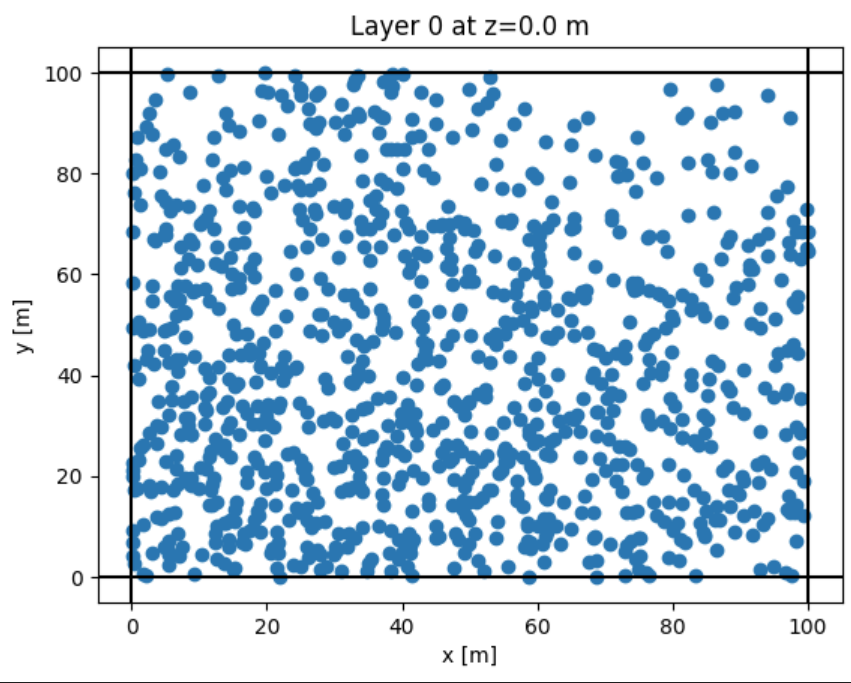

What does it mean there are clearly some hits that are outside the detector boundaries? This will become important in the next step.

### Simulate

This step is very easy - we have everything we need already, minus a few small things. Write a function `simulate` that takes a single particle and returns the $(x,y)$ coordinates of the track hitting each layer. If the hit is outside the detector, it should return `None` in that position. The cell after this has some tests to make sure we get this right.

In [ ]:
assert simulate(gen_particle(0, 0)) == ((0,0), (0,0), (0,0), (0,0), (0,0))
assert simulate(gen_particle(1.0, 0)) == (None, None, None, None, None)
assert simulate(gen_particle(0, -0.1)) == (None, None, None, None, None)

# Submission

Fantastic! You are done!

To submit this HW:

1. Reset the kernel and run it again top to bottom. The cell numbers for code cells should all be in order!
2. Save this file
3. Use your web browser to print to PDF (or save as PDF) the open notebook.
4. Submit the PDF

You are done!